In [48]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(r'E:\AIO\From_Linear_Regression_To_Logistic_Regression\Data\iris_1D.csv',
                        delimiter=',',
                        skip_header=1)

X = iris[:, :1]
y = iris[:, 1]
N = 6

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

#shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)

(6, 2)
(6,)


In [49]:
def sigmod_function(z):
    return 1 / (1 + np.exp(-z))

def predict(x, theta):
    y_hat = sigmod_function(np.dot(x, theta))
    return y_hat

def loss_fuction(y_hat, y):
    return ((y_hat - y)*(y_hat - y)).mean()

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)*y_hat*(1 - y_hat)*2) / y.size

def update_weights(gradient, theta, lr):
    return theta - gradient*lr

In [50]:
lr = 0.1
num_epoch = 50000
theta = np.array([0.1, 5])
#theta = np.array([0.1, -5])

In [51]:
losses = []
accs = []

for _ in range(num_epoch):

    #predict 
    y_hat = predict(X, theta)

    #compute loss
    loss = loss_fuction(y_hat, y)
    losses.append(loss) #debug

    #compute gradient
    gradient = compute_gradient(X, y_hat, y)

    #update weights
    theta = update_weights(gradient, theta, lr)

    #accuarancy for training
    preds = predict(X, theta).round()
    acc = (preds == y).mean()
    accs.append(acc)


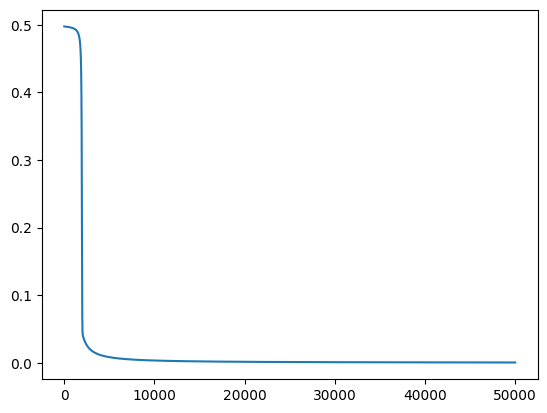

In [52]:
plt.plot(losses)
plt.show()

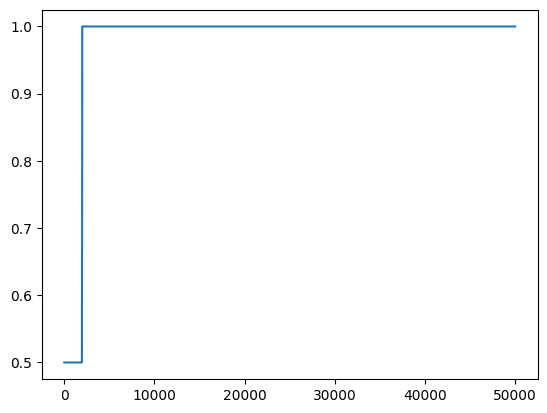

In [53]:
plt.plot(accs)
plt.show()